In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import pandas as pd
from scipy import stats

In [15]:
cx = pd.DataFrame({'subject': ['Segundo', 'Valentino', 'Doppio', 'Alessandro', 'Allan'], 'decline': [130.479, 79.9561, 103.725, 71.8083, 179.685]}).set_index('subject')
print(cx.to_markdown())

| subject    |   decline |
|:-----------|----------:|
| Segundo    |  130.479  |
| Valentino  |   79.9561 |
| Doppio     |  103.725  |
| Alessandro |   71.8083 |
| Allan      |  179.685  |


In [16]:
stats.ttest_1samp(cx, 0)

Ttest_1sampResult(statistic=array([5.79319986]), pvalue=array([0.00441349]))

In [17]:
hc = pd.DataFrame({'subject': ['Segundo', 'Valentino', 'Doppio', 'Alessandro', 'Allan'], 'decline': [37.7329, 22.705, 43.8976, 50.438, 38.512]}).set_index('subject')
print(hc.to_markdown())

| subject    |   decline |
|:-----------|----------:|
| Segundo    |   37.7329 |
| Valentino  |   22.705  |
| Doppio     |   43.8976 |
| Alessandro |   50.438  |
| Allan      |   38.512  |


In [18]:
stats.ttest_1samp(hc, 0)

Ttest_1sampResult(statistic=array([8.41967719]), pvalue=array([0.00108941]))

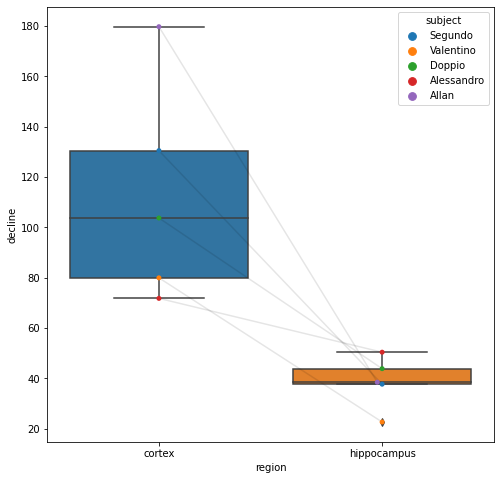

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def join_swarm_points(df, ax, x_variable):
    left_key, right_key = df.index.get_level_values(x_variable).unique()

    left_pts = ax.get_children()[0].get_offsets()
    right_pts = ax.get_children()[1].get_offsets()

    for subject_name in df.index.get_level_values('subject').unique():
        left_val = df.xs((left_key, subject_name))
        right_val = df.xs((right_key, subject_name))
        left_pt_idx = np.argwhere(np.isclose(left_pts, left_val)).squeeze()[0]
        right_pt_idx = np.argwhere(np.isclose(right_pts, right_val)).squeeze()[0]
        x = [left_pts[left_pt_idx, 0], right_pts[right_pt_idx, 0]]
        y = [left_pts[left_pt_idx, 1], right_pts[right_pt_idx, 1]]
        ax.plot(x, y, color='black', alpha=0.1)
        
df = pd.concat([cx, hc], keys=['cortex', 'hippocampus'], names=['region', 'subject'])

fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(data=df.reset_index(), x='region', y='decline', ax=ax)
sns.swarmplot(data=df.reset_index(), x='region', y='decline', hue='subject', ax=ax)
join_swarm_points(df, ax, 'region')